# 1.1.3 사이킷런의 의사결정나무 알고리즘 알아보기

* Supervised learning의 classification 기법을 통해 새로 들어온 고객이 물건을 구매할지, 구매하지 않을지를 분류하는 문제를 풀 수 있습니다.

* classification 기법 중에서 Decision Tree 알고리즘을 활용해보겠습니다. Decision tree는 CART(Classification and Regression Tree) 알고리즘이라고도 불립니다.

* 사이킷런 라이브러리를 소개하는 사이트에 사용 예제가 나와있습니다.
https://scikit-learn.org/stable/modules/tree.html

In [ ]:
# 사이킷런(sklearn) 패키지를 활용해 tree 패키지를 불러옵니다.
# tree 패키지 안에는 DecisionTreeClassifier (의사결정 트리 분류) 모듈이 있습니다.
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]

In [2]:
# clf 에 DecisionTreeClassifier 모델 객체를 선언한 후, 설정 가능한 parameter들을 확인할 수 있습니다.
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [3]:
# fit 함수를 통해 모델을 학습하고 저장합니다.
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
# predict 함수는 정답을 [0, 1] 중 하나로만 나타냅니다.
clf.predict([[2., 2.]])

array([1])

In [5]:
# predicg_proba 함수를 사용하면 값이 비율로 출력됩니다.
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [6]:
# 데이터셋이 라이브러리에 이미 내장된 경우도 있습니다.
# Decision tree 알고리즘은 숫자만 이해할 수 있기 때문에 0, 1, 2로 카테고리가 구분됩니다.
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)

In [7]:
# DecisionTreeClassifier 모델을 선언한 후에 fit 함수를 사용하면 학습이 진행됩니다.
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

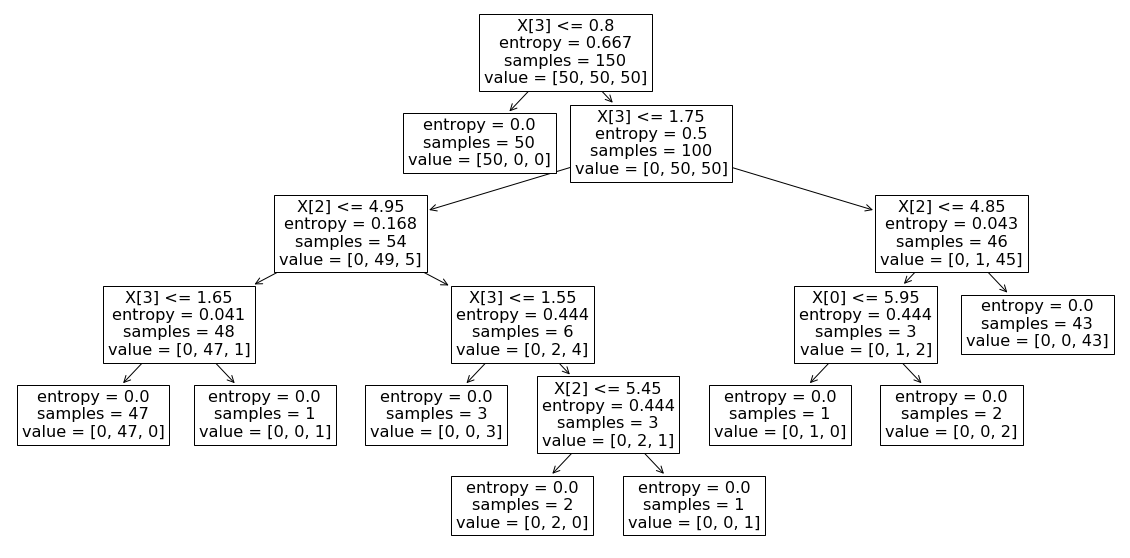

In [8]:
# 예제에 있던 iris.data, iris.target를 X, y로 바꾸어 시각화를 합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
t = tree.plot_tree(clf.fit(X, y))

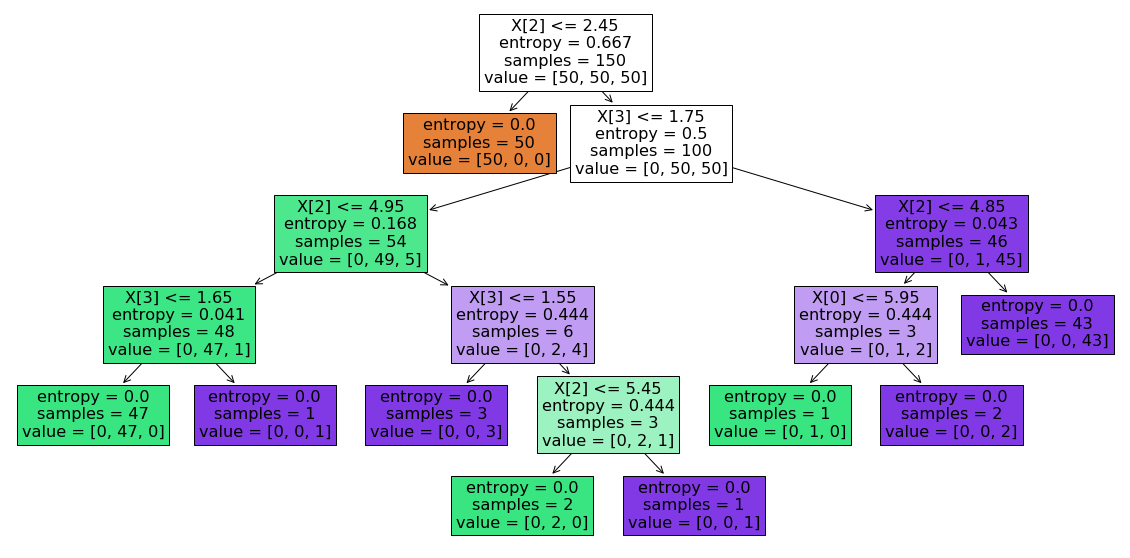

In [9]:
# filled=True 로 설정하면 사이트에 나온 색상과 동일하게 나타납니다.
plt.figure(figsize=(20, 10))
t = tree.plot_tree(clf.fit(X, y), filled=True)

* 가지를 지날 수록 sample 의 수가 줄어들며 분류를 진행합니다.

* 특정 조건에 따라 왼쪽과 오른쪽으로 나눠지며 타고 내려갑니다. 스무고개와도 유사하다고 생각할 수 있습니다.

In [ ]:
# graphviz 라는 라이브러리를 설치하면 다른 형태의 시각화가 가능합니다.
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")